# Scratch Artificial Neural Network

In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import sys
sys.dont_write_bytecode = True
sys.path.append('..')

# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import custom modules
from ArtificialNeuralNetwork import ArtificialNeuralNetwork
from Layer import Layer, OutputLayer, InputLayer
from Function import ActivationFunction, LossFunction
from enums import InitializerType, RegularizationType

# Pipeline for testing MNIST dataset

In [62]:
input_size = 784
hidden_layers = 5
hidden_size = 128
output_size = 10
learning_rate = 0.1
param_1 = 0
param_2 = 0.5
batch_size = 64


In [63]:
# Load MNIST dataset using fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

In [64]:
regularization_types = [RegularizationType.L1, RegularizationType.L2, None]
models_with_regularization = {}

for reg_type in regularization_types:
    name = reg_type.name if reg_type else "None"
    
    model = ArtificialNeuralNetwork(
        123,
        InputLayer(input_size=input_size),
        Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.HE,
            input_size=input_size,
            num_neurons=128,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer 0",
        ),
        *[Layer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.HE,
            input_size=128,
            num_neurons=128,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.prelu,
            alpha=0.2,
            layer_name=f"Hidden Layer {_}",
            regularizer=reg_type
        ) for _ in range(hidden_layers - 1)],
        OutputLayer(
            weight_init=InitializerType.HE,
            bias_init=InitializerType.HE,
            input_size=128,
            num_neurons=output_size,
            param_1=param_1,
            param_2=param_2,
            activation=ActivationFunction.softmax,
            loss_funct=LossFunction.categorical_cross_entropy,
            layer_name="Output Layer"
        )
    )
    
    models_with_regularization[name] = model


In [65]:
loss_by_regularization = {}

for name, model in models_with_regularization.items():
    print(f"\nTraining model with {name} regularization...\n" + "-" * 50)
    
    loss = model.train(
        x=X_train,
        y=y_train,
        loss_function=LossFunction.categorical_cross_entropy,
        lr=0.01,
        epochs=20,
        batch_size=batch_size,
        verbose=True,
        validation_data=(X_test, y_test),
    )

    loss_by_regularization[name] = loss  # Store (train_loss, val_loss)



Training model with L1 regularization...
--------------------------------------------------


Training: 100%|██████████| 20/20 [02:31<00:00,  7.57s/it, Loss: 3.2128, Val Loss: 3.3020]


Total training time: 143.50s

Training model with L2 regularization...
--------------------------------------------------


Training: 100%|██████████| 20/20 [02:25<00:00,  7.29s/it, Loss: 1.2862, Val Loss: 1.4089]


Total training time: 137.42s

Training model with None regularization...
--------------------------------------------------


Training: 100%|██████████| 20/20 [02:13<00:00,  6.68s/it, Loss: 0.3445, Val Loss: 0.6251]

Total training time: 125.91s


In [66]:
# model_loss = {}

# for name, model in models_by_initializer.items():
#     print(f"\nTraining model with {name} initializer...\n" + "-" * 50)

#     # history = 
#     loss = model.train(
#         x=X_train,
#         y=y_train,
#         loss_function=LossFunction.categorical_cross_entropy,
#         lr=0.01,
#         epochs=5,
#         batch_size=batch_size,
#         verbose=True,
#         validation_data=(X_test, y_test),
#     )

#     model_loss[name] = loss  # Store training history for analysis


In [67]:
from sklearn.metrics import f1_score

f1_scores_by_regularization = {}

for name, model in models_with_regularization.items():
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, average='macro')
    f1_scores_by_regularization[name] = score
    print(f"{name} Regularization - F1 Score: {score:.4f}")


L1 Regularization - F1 Score: 0.8798
L2 Regularization - F1 Score: 0.9541
None Regularization - F1 Score: 0.9693


In [68]:
# from sklearn.metrics import f1_score

# print("\nF1 Scores for Activation Functions:")
# for name, model in activation_models.items():
#     y_pred = model.predict(X_test)
#     score = f1_score(y_test, y_pred, average='macro')
#     print(f"{name}: {score:.4f}")


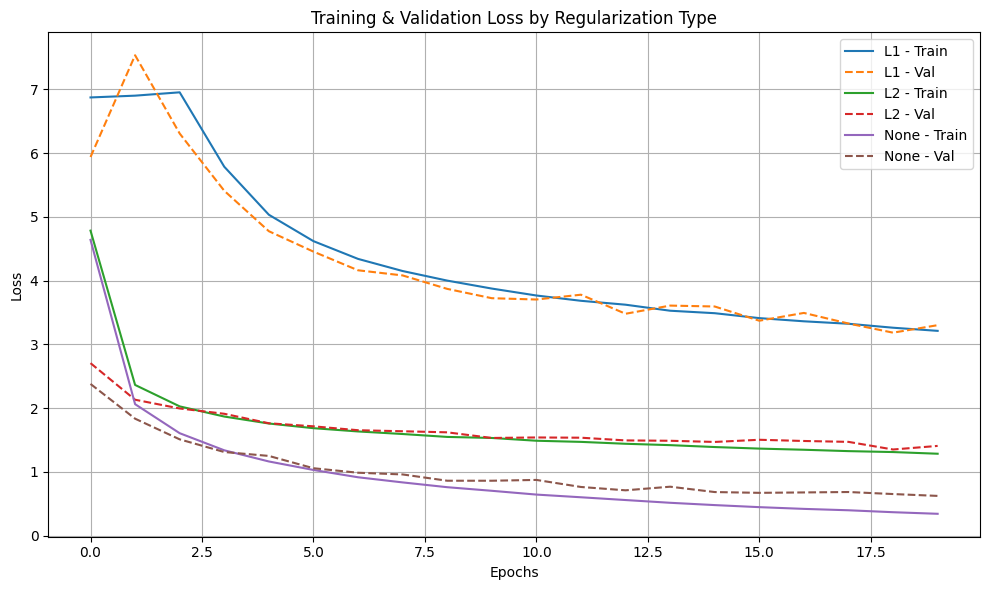

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, (train_loss, val_loss) in loss_by_regularization.items():
    plt.plot(train_loss, label=f'{name} - Train')
    plt.plot(val_loss, linestyle='--', label=f'{name} - Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss by Regularization Type')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



L1 Regularization - Weight Distribution
--------------------------------------------------


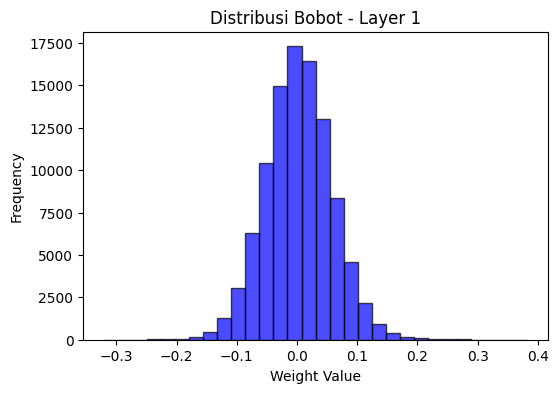

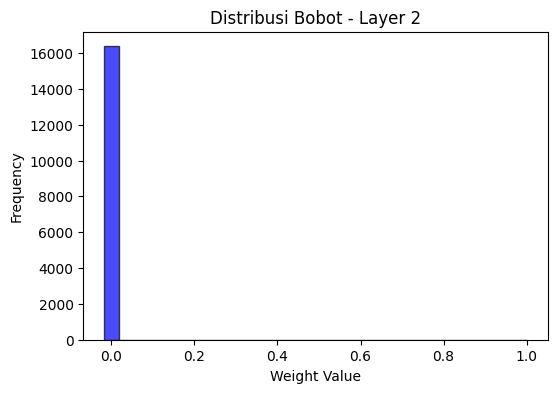

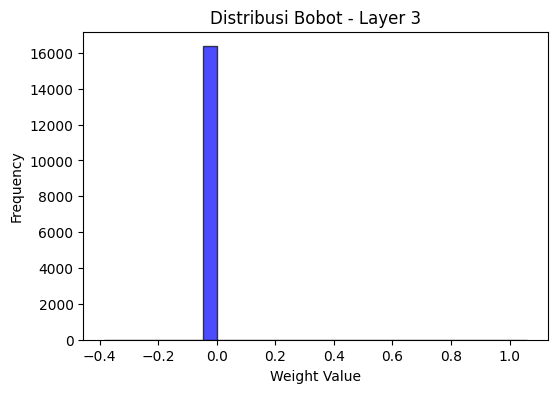


L2 Regularization - Weight Distribution
--------------------------------------------------


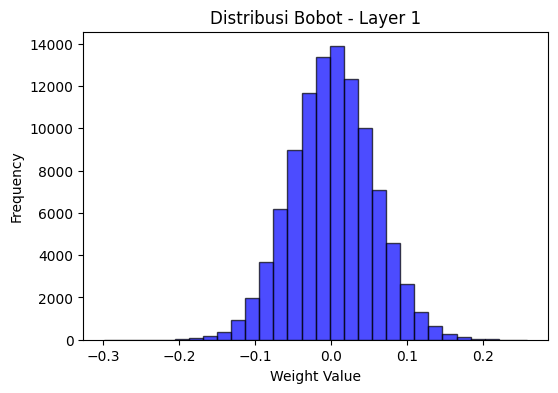

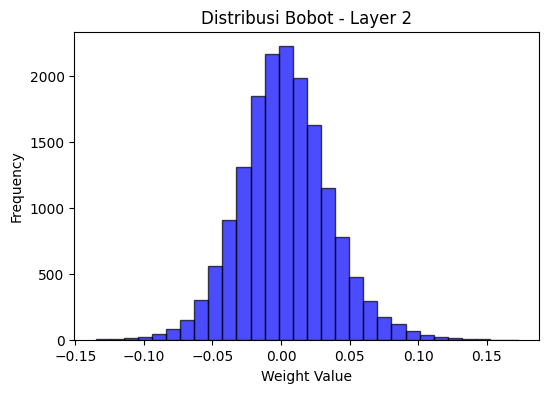

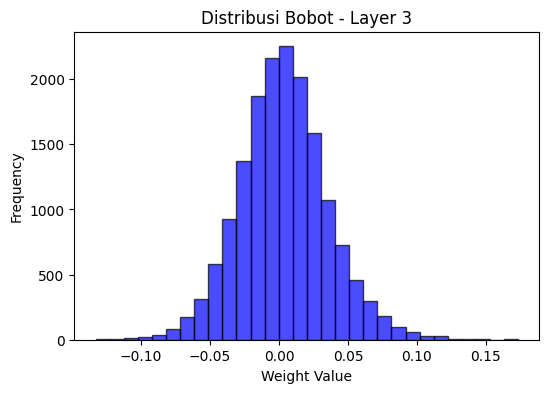


None Regularization - Weight Distribution
--------------------------------------------------


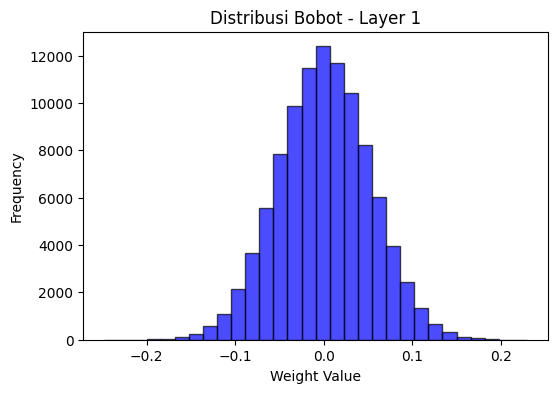

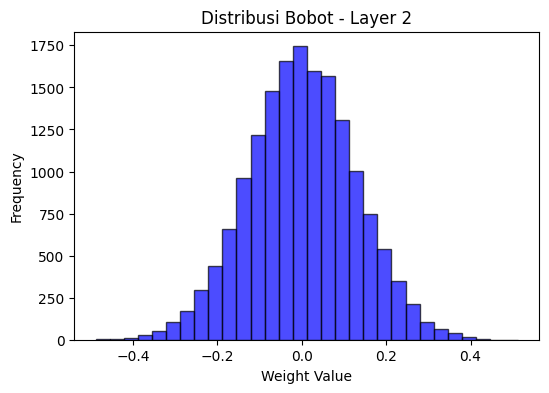

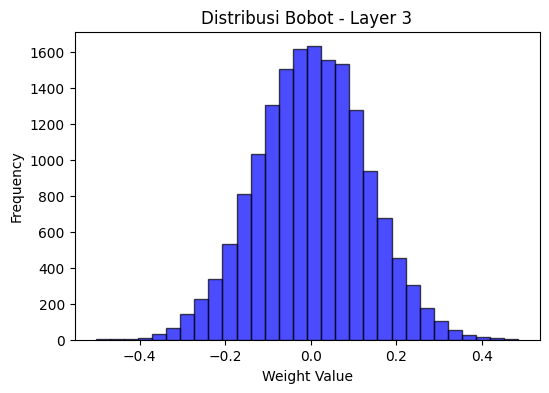

In [70]:
# ann_regularized.visualize_weight_distribution((1,2,3))

for name, model in models_with_regularization.items():
    print(f"\n{name} Regularization - Weight Distribution\n" + "-" * 50)
    model.visualize_weight_distribution((1, 2, 3))




L1 Regularization - Weight Distribution
--------------------------------------------------


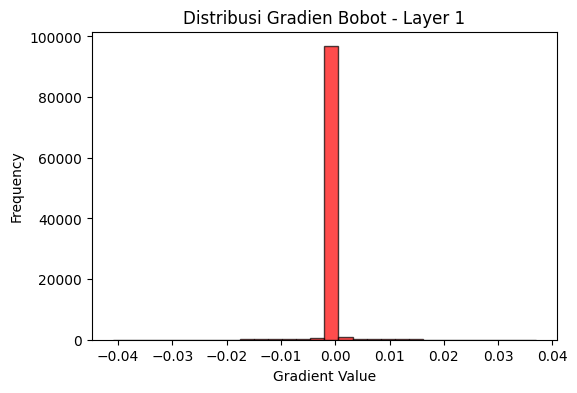

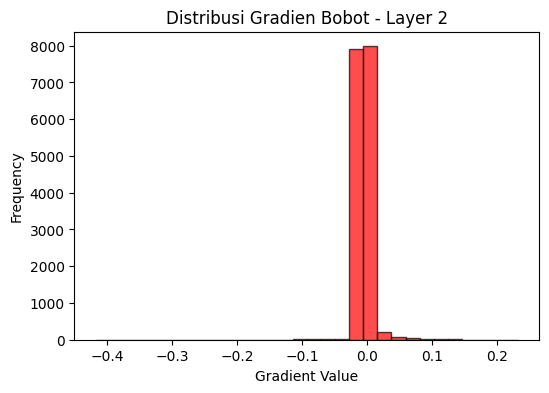

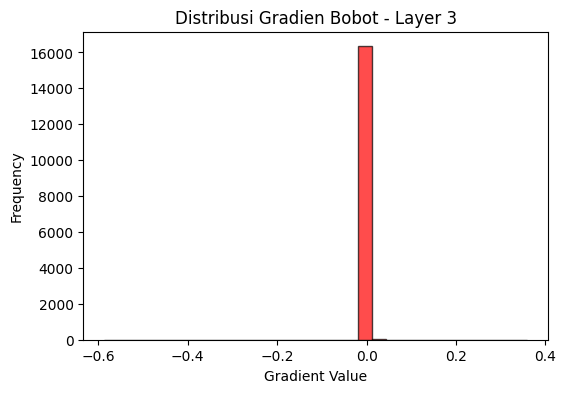


L2 Regularization - Weight Distribution
--------------------------------------------------


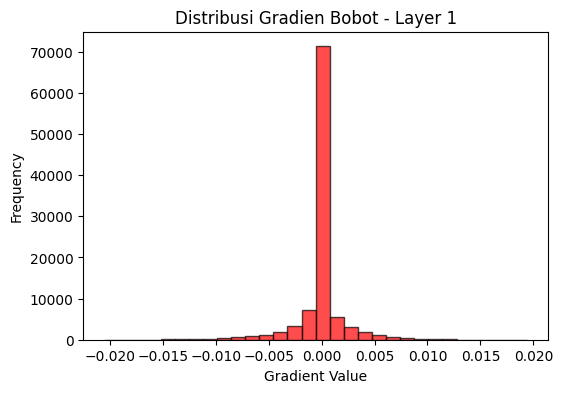

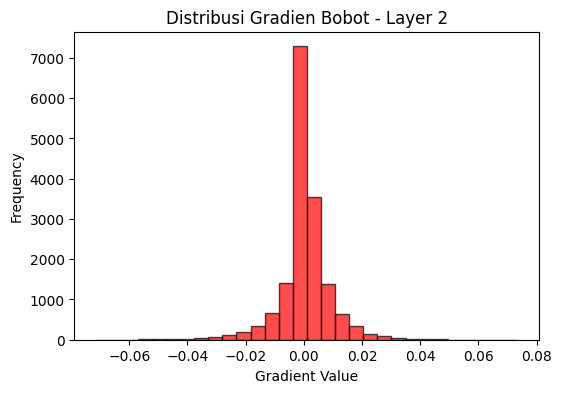

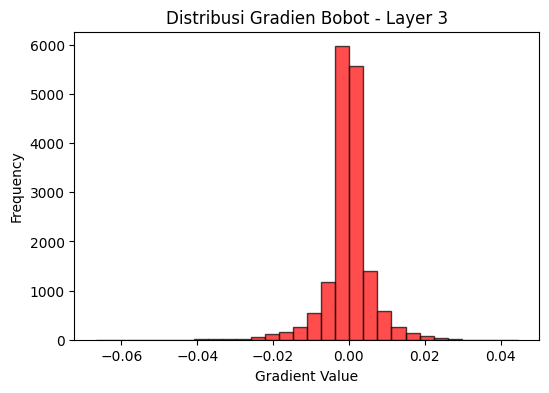


None Regularization - Weight Distribution
--------------------------------------------------


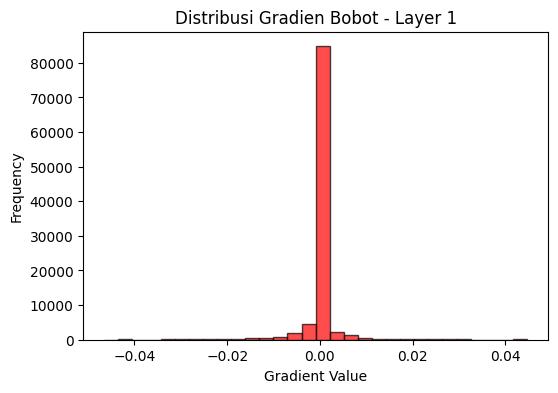

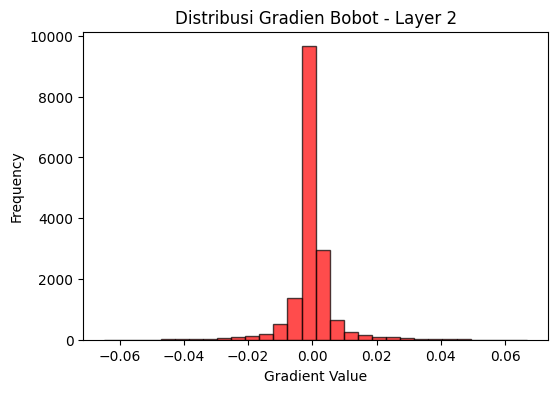

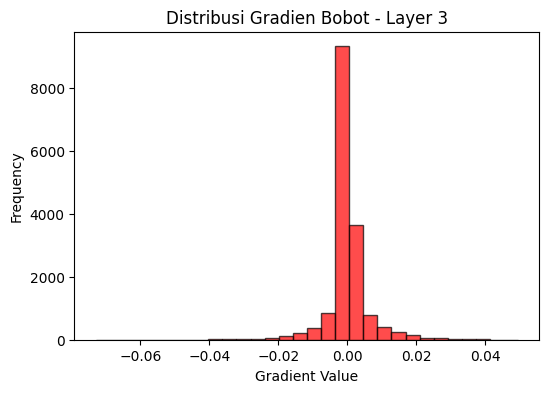

In [71]:
# ann_regularized.visualize_gradient_distribution((1,2,3))

for name, model in models_with_regularization.items():
    print(f"\n{name} Regularization - Weight Distribution\n" + "-" * 50)
    model.visualize_gradient_distribution((1, 2, 3))


